In [22]:
%matplotlib inline


# Filling holes and finding peaks


We fill holes (i.e. isolated, dark spots) in an image using morphological
reconstruction by erosion. Erosion expands the minimal values of the seed image
until it encounters a mask image. Thus, the seed image and mask image represent
the maximum and minimum possible values of the reconstructed image.

We start with an image containing both peaks and holes:




In [25]:
import matplotlib.pyplot as plt

# from skimage import data
# from skimage.exposure import rescale_intensity

# image = data.moon()
# Rescale image intensity so that we can see dim features.
# image = rescale_intensity(image, in_range=(50, 200))

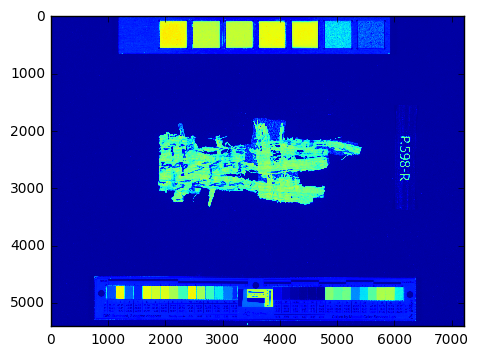

In [26]:
image = plt.imread("/Users/il239838/Downloads/private/Thesis/Papyrus/jm_4a36716c764b6d6b4c442f464b3342347436653838673d3d/P598-Fg009-R/P598-Fg009-R-C01-R01-D07012014-T124244-LR924__012.jpg")
plt.imshow(image)

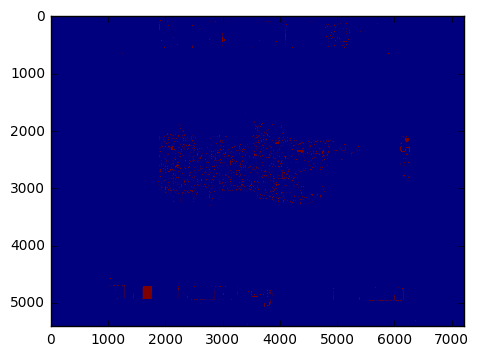

In [15]:
image = rescale_intensity(image, in_range=(50, 200))
from skimage.feature import canny
edges = canny(image/255.)
from scipy import ndimage as ndi
fill_coins = ndi.binary_fill_holes(edges)
plt.imshow(fill_coins)

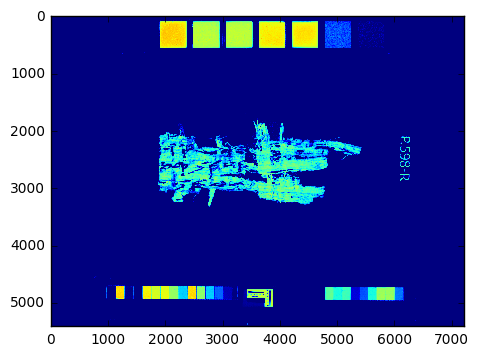

In [18]:
plt.imshow(image)

Now we need to create the seed image, where the minima represent the
starting points for erosion.  To fill holes, we initialize the seed image
to the maximum value of the original image. Along the borders, however, we
use the original values of the image. These border pixels will be the
starting points for the erosion process. We then limit the erosion by
setting the mask to the values of the original image.



In [7]:
import numpy as np
from skimage.morphology import reconstruction

seed = np.copy(image)
seed[1:-1, 1:-1] = image.max()
mask = image

filled = reconstruction(seed, mask, method='erosion')

As shown above, eroding inward from the edges removes holes, since (by
definition) holes are surrounded by pixels of brighter value. Finally, we
can isolate the dark regions by subtracting the reconstructed image from
the original image.

Alternatively, we can find bright spots in an image using morphological
reconstruction by dilation. Dilation is the inverse of erosion and expands
the *maximal* values of the seed image until it encounters a mask image.
Since this is an inverse operation, we initialize the seed image to the
minimum image intensity instead of the maximum. The remainder of the
process is the same.



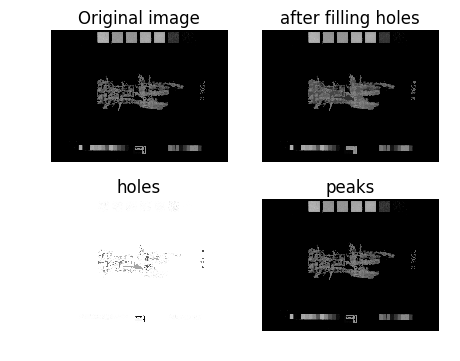

In [8]:
seed = np.copy(image)
seed[1:-1, 1:-1] = image.min()
rec = reconstruction(seed, mask, method='dilation')

fig, ax = plt.subplots(2, 2, figsize=(5, 4), sharex=True, sharey=True,
                       subplot_kw={'adjustable': 'box-forced'})
ax = ax.ravel()

ax[0].imshow(image, cmap='gray')
ax[0].set_title('Original image')
ax[0].axis('off')

ax[1].imshow(filled, cmap='gray')
ax[1].set_title('after filling holes')
ax[1].axis('off')

ax[2].imshow(image-filled, cmap='gray')
ax[2].set_title('holes')
ax[2].axis('off')

ax[3].imshow(image-rec, cmap='gray')
ax[3].set_title('peaks')
ax[3].axis('off')
plt.show()